In [7]:
from numpy import log2, sqrt, log
from scipy.special import comb
from AllFunctions import *
from random import sample
import time
import matplotlib.pyplot as plt

In [8]:
class RandomForest(DecisionTree):
    def __init__(self, train, labels, attributes, depth = -1, weights = None):
        super().__init__(train, labels, attributes, depth, weights)

    
    def best_att(self, train, labels, attributes, weights = None):
    
        #k = int(sqrt(len(attributes)))
        if len(attributes)>= 2:
            k= 2
        else:
            k=1
            
        sample_attributes = sample(attributes, k)
        
        lable_Ent = entropy(labels, weights)
        Max = -1
        Best = None
        Best_values = None
    
        for attribute in sample_attributes: 
            temp, temp_values = Entropy_given_attribute(train, labels, attribute, weights) 
            if lable_Ent - temp >  Max:
                Max = lable_Ent - temp
                Best = attribute
                Best_values = temp_values
                    
        return(Best, Best_values)

In [9]:
train, train_labels, test, test_labels = load_bank()

In [10]:
X, Y = my_sample(train, train_labels)
A = RandomForest(X, Y, [i for i in range(len(train[0]))], depth = -1)
print(error(A, train, train_labels))
print(error(A, test, test_labels))

0.069
0.1654


In [11]:
A = DecisionTree(train, train_labels, [i for i in range(len(train[0]))], depth = -1)
print(error(A, train, train_labels))
print(error(A, test, test_labels))

0.0132
0.1562


# Random Forest

In [19]:
start = time.time()

Forest = []
for x in range(1000):
    X, Y = my_sample(train, train_labels)
    Forest.append (RandomForest(X, Y, [i for i in range(len(train[0]))], depth = -1))
    
print(time.time()- start)

510.73825097084045


In [20]:
def Error(List_Tress, X, Y):
    
    n = len(Y)
    error = [0] * len(List_Tress)
    
    for i in range(n):
        count = {}
        majority = None
        Max = -1
        for j in range(len(List_Tress)):
            

            temp = List_Tress[j].predict(X[i]) 
            if temp not in count:
                count[temp] = 0
                
            count[temp] += 1
            if count[temp] > Max:
                Max = count[temp]
                majority = temp
        
            if majority != Y[i]:
                error[j] += 1/len(Y)
    return(error)

In [21]:
E_test = Error(Forest, test, test_labels)

In [22]:
E_train = Error(Forest, train, train_labels)

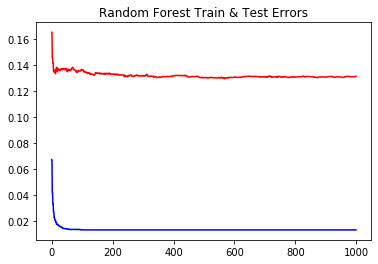

In [23]:
plt.plot(E_train, color ='blue')
plt.plot(E_test, color ='red')

plt.axis()
plt.title("Random Forest Train & Test Errors", color='black') 
plt.show()

# Bagged Decision Trees

In [30]:
start = time.time()
Forest1 = []

for x in range(1000):
    X, Y = my_sample(train, train_labels)
    Forest1.append (DecisionTree(X, Y, [i for i in range(len(train[0]))], depth = -1))
    
print(time.time()- start)

549.6036601066589


In [31]:
EE_train = Error(Forest1, train, train_labels)

In [32]:
EE_test = Error(Forest1, test, test_labels)

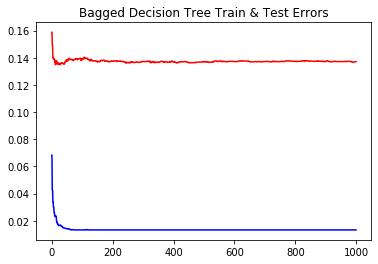

In [33]:
plt.plot(EE_train, color ='blue')
plt.plot(EE_test, color ='red')

plt.axis()
plt.title("Bagged Decision Tree Train & Test Errors", color='black') 
plt.show()